In [217]:
import billboard
import re
from calendar import monthrange
import matplotlib.pyplot as plt
import time
import pickle
from collections import OrderedDict
import pandas as pd
import numpy as np

In [137]:
chart = billboard.ChartData('artist-100',date="2023-01-04")
print(previousdate(chart))
chart2 = billboard.ChartData('artist-100',date=previousdate(chart))

2022-12-31


In [136]:
chart.title
def previousdate(chart):
    s = re.sub(r'[^0-9]', '',chart.date)
    d = int(s[6:])
    m = int(s[4:6])
    y = int(s[:4])
    d-=7
    if(d<=0):
        m -= 1
        if(m == 0):
            y -= 1
            m = 12
        d = monthrange(y,m)[1] + d
    if(d < 10):
        d = "0" + str(d)
    if(m < 10):
        m = "0" + str(m)
    return f"{y}-{m}-{d}"

In [130]:
previousdate(chart)

'2023-02-04'

In [138]:

def create_chart_database(chart_name, min_year, database_filename):
    """ Creates a offline database of billboard charts
    
    Get all charts from the billboard chart with 'chart_name' up to and including
    the charts from min_year and save the database as 'database_filename.pkl'.
    Example: create_chart_database('hot-100', 1993, 'hot-100-1993') 
    """
    chart = billboard.ChartData(chart_name)
    year = int(chart.date[:4])
    chart_database = OrderedDict()
     
    while year >= min_year:     
        # Output to give feedback on the progress
        print(chart.date)        
        print(year)
        
        # Include chart in database
        chart_database[chart.date] = chart

        # Get older chart
        older_chart = billboard.ChartData('artist-100', date=previousdate(chart))
        while len(older_chart) != 100:
            print('Could not download the chart, trying agian in 2 seconds.')
            time.sleep(2)
            older_chart = billboard.ChartData('artist-100', date=previousdate(chart))
            
        chart = older_chart
        year = int(chart.date[:4])

    # Save database
    print(chart_database)
    pickle.dump(chart_database , open(database_filename+".pkl", "wb"))


In [144]:
create_chart_database('artist-100',2018,'artist-100-2018')

2023-02-11
2023
2023-02-04
2023
2023-01-28
2023
2023-01-21
2023
2023-01-14
2023
2023-01-07
2023
2022-12-31
2022
2022-12-24
2022
2022-12-17
2022
2022-12-10
2022
2022-12-03
2022
2022-11-26
2022
2022-11-19
2022
2022-11-12
2022
2022-11-05
2022
2022-10-29
2022
2022-10-22
2022
2022-10-15
2022
2022-10-08
2022
2022-10-01
2022
2022-09-24
2022
2022-09-17
2022
2022-09-10
2022
2022-09-03
2022
2022-08-27
2022
2022-08-20
2022
2022-08-13
2022
2022-08-06
2022
2022-07-30
2022
2022-07-23
2022
2022-07-16
2022
2022-07-09
2022
2022-07-02
2022
2022-06-25
2022
2022-06-18
2022
2022-06-11
2022
2022-06-04
2022
2022-05-28
2022
2022-05-21
2022
2022-05-14
2022
2022-05-07
2022
2022-04-30
2022
2022-04-23
2022
2022-04-16
2022
2022-04-09
2022
2022-04-02
2022
2022-03-26
2022
2022-03-19
2022
2022-03-12
2022
2022-03-05
2022
2022-02-26
2022
2022-02-19
2022
2022-02-12
2022
2022-02-05
2022
2022-01-29
2022
2022-01-22
2022
2022-01-15
2022
2022-01-08
2022
2022-01-01
2022
2021-12-25
2021
2021-12-18
2021
2021-12-11
2021
2021-12-

In [155]:

def normalize_str(s):
    """ Normalizes strings 
    
    Removes all non alphanumeric letters, lowercases
    everything and removes all whitespaces.
    """
    # Remove non alphanumeric letters, lowercase everything
    # Remove all whitespaces   
    s = re.sub(r'[^A-Za-z0-9]', '',s).lower()
    return s

rank: 35, date: 2018-01-06
rank: 43, date: 2018-01-13
rank: 35, date: 2018-01-20
rank: 35, date: 2018-01-27
rank: 41, date: 2018-02-03
rank: 36, date: 2018-02-10
rank: 34, date: 2018-02-17
rank: 39, date: 2018-02-24
rank: 35, date: 2018-03-03
rank: 37, date: 2018-03-10
rank: 44, date: 2018-03-17
rank: 46, date: 2018-03-24
rank: 37, date: 2018-03-31
rank: 50, date: 2018-04-07
rank: 49, date: 2018-04-14
rank: 56, date: 2018-04-21
rank: 53, date: 2018-04-28
rank: 57, date: 2018-05-05
rank: 51, date: 2018-05-12
rank: 54, date: 2018-05-19
rank: 67, date: 2018-05-26
rank: 76, date: 2018-06-02
rank: 87, date: 2018-06-09
rank: 71, date: 2018-06-16
rank: 68, date: 2018-06-23
rank: 81, date: 2018-06-30
rank: 100, date: 2018-07-07
rank: 88, date: 2018-07-14
rank: 84, date: 2018-07-21
rank: 88, date: 2018-08-11
rank: 94, date: 2018-08-25
rank: 88, date: 2018-09-01
rank: 86, date: 2018-09-15
rank: 98, date: 2018-09-22
rank: 97, date: 2018-09-29
rank: 100, date: 2018-10-06
rank: 80, date: 2018-10-20

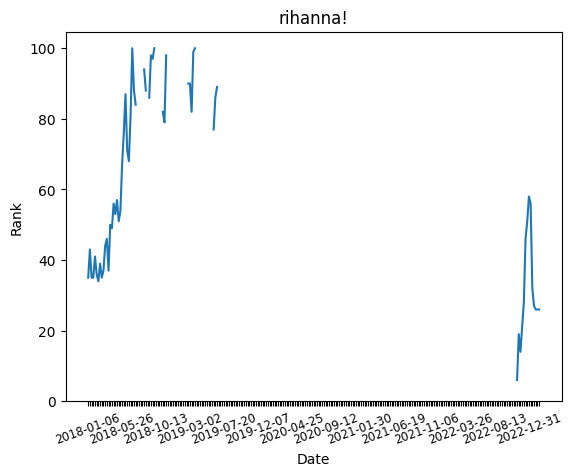

rank: 5, date: 2018-01-06
rank: 6, date: 2018-01-13
rank: 9, date: 2018-01-20
rank: 12, date: 2018-01-27
rank: 19, date: 2018-02-03
rank: 23, date: 2018-02-10
rank: 22, date: 2018-02-17
rank: 17, date: 2018-02-24
rank: 19, date: 2018-03-03
rank: 26, date: 2018-03-10
rank: 30, date: 2018-03-17
rank: 37, date: 2018-03-24
rank: 36, date: 2018-03-31
rank: 46, date: 2018-04-07
rank: 42, date: 2018-04-14
rank: 47, date: 2018-04-21
rank: 47, date: 2018-04-28
rank: 52, date: 2018-05-05
rank: 61, date: 2018-05-12
rank: 55, date: 2018-05-19
rank: 56, date: 2018-05-26
rank: 71, date: 2018-06-02
rank: 63, date: 2018-06-09
rank: 54, date: 2018-06-16
rank: 58, date: 2018-06-23
rank: 70, date: 2018-06-30
rank: 68, date: 2018-07-07
rank: 78, date: 2018-07-14
rank: 67, date: 2018-07-21
rank: 63, date: 2018-07-28
rank: 64, date: 2018-08-04
rank: 76, date: 2018-08-11
rank: 70, date: 2018-08-18
rank: 55, date: 2018-08-25
rank: 64, date: 2018-09-01
rank: 64, date: 2018-09-08
rank: 1, date: 2018-09-15
rank:

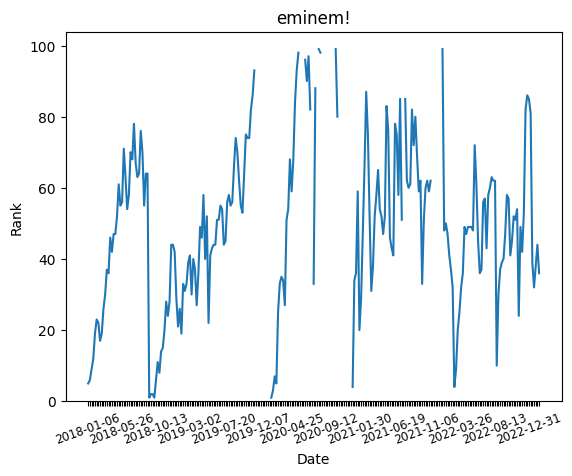

rank: 97, date: 2022-02-12
rank: 50, date: 2022-02-19
rank: 5, date: 2022-02-26
rank: 16, date: 2022-03-05
rank: 31, date: 2022-03-12
rank: 38, date: 2022-03-19
rank: 56, date: 2022-03-26
rank: 55, date: 2022-04-02
rank: 76, date: 2022-04-09
rank: 78, date: 2022-04-16
rank: 87, date: 2022-04-23
rank: 82, date: 2022-04-30
rank: 99, date: 2022-05-07
rank: 98, date: 2022-05-14


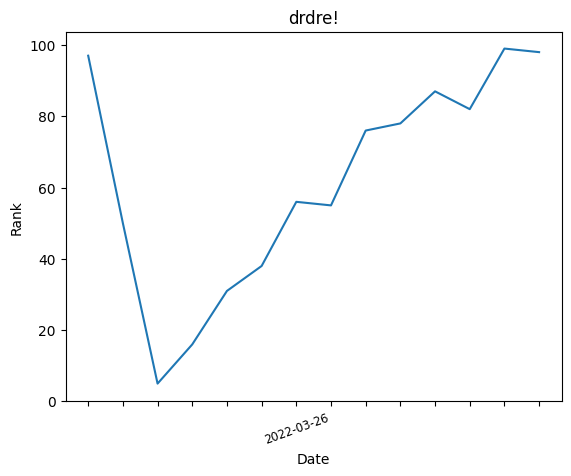

rank: 25, date: 2022-02-26
rank: 60, date: 2022-03-05
rank: 47, date: 2022-08-20


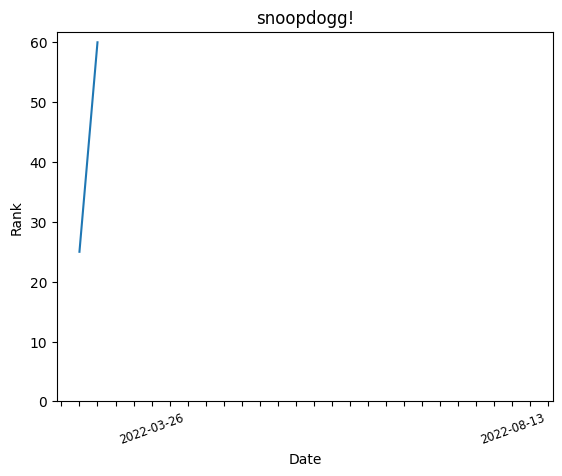

rank: 9, date: 2018-01-06
rank: 4, date: 2018-01-13
rank: 6, date: 2018-01-20
rank: 10, date: 2018-01-27
rank: 12, date: 2018-02-03
rank: 11, date: 2018-02-10
rank: 6, date: 2018-02-17
rank: 4, date: 2018-02-24
rank: 3, date: 2018-03-03
rank: 6, date: 2018-03-10
rank: 5, date: 2018-03-17
rank: 7, date: 2018-03-24
rank: 7, date: 2018-03-31
rank: 9, date: 2018-04-07
rank: 8, date: 2018-04-14
rank: 10, date: 2018-04-21
rank: 9, date: 2018-04-28
rank: 10, date: 2018-05-05
rank: 12, date: 2018-05-12
rank: 14, date: 2018-05-19
rank: 14, date: 2018-05-26
rank: 11, date: 2018-06-02
rank: 14, date: 2018-06-09
rank: 19, date: 2018-06-16
rank: 23, date: 2018-06-23
rank: 26, date: 2018-06-30
rank: 27, date: 2018-07-07
rank: 29, date: 2018-07-14
rank: 28, date: 2018-07-21
rank: 29, date: 2018-07-28
rank: 30, date: 2018-08-04
rank: 35, date: 2018-08-11
rank: 39, date: 2018-08-18
rank: 38, date: 2018-08-25
rank: 36, date: 2018-09-01
rank: 48, date: 2018-09-08
rank: 40, date: 2018-09-15
rank: 46, date

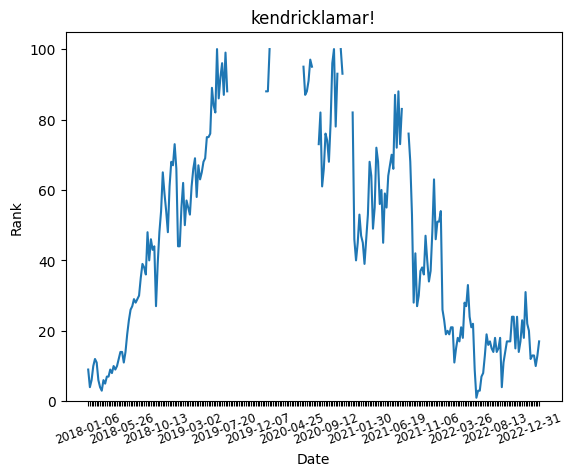

rank: 92, date: 2022-02-19
rank: 7, date: 2022-02-26
rank: 43, date: 2022-03-05
rank: 82, date: 2022-03-12


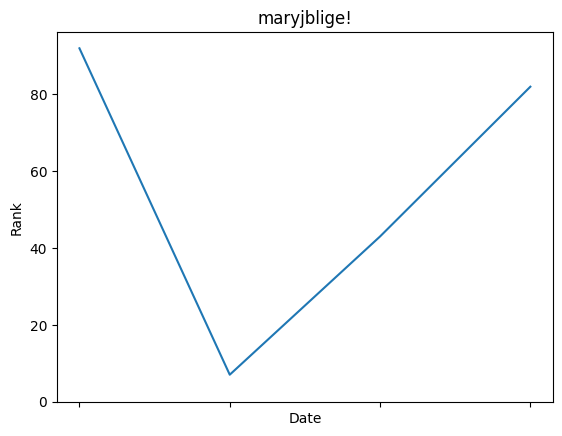

rank: 61, date: 2018-01-06
rank: 40, date: 2018-01-13
rank: 41, date: 2018-01-20
rank: 52, date: 2018-01-27
rank: 44, date: 2018-02-03
rank: 48, date: 2018-02-10
rank: 19, date: 2018-02-17
rank: 25, date: 2018-02-24
rank: 24, date: 2018-03-03
rank: 23, date: 2018-03-10
rank: 28, date: 2018-03-17
rank: 36, date: 2018-03-24
rank: 35, date: 2018-03-31
rank: 33, date: 2018-04-07
rank: 1, date: 2018-04-14
rank: 6, date: 2018-04-21
rank: 7, date: 2018-04-28
rank: 11, date: 2018-05-05
rank: 11, date: 2018-05-12
rank: 15, date: 2018-05-19
rank: 15, date: 2018-05-26
rank: 16, date: 2018-06-02
rank: 19, date: 2018-06-09
rank: 26, date: 2018-06-16
rank: 33, date: 2018-06-23
rank: 45, date: 2018-06-30
rank: 48, date: 2018-07-07
rank: 49, date: 2018-07-14
rank: 52, date: 2018-07-21
rank: 53, date: 2018-07-28
rank: 55, date: 2018-08-04
rank: 62, date: 2018-08-11
rank: 64, date: 2018-08-18
rank: 49, date: 2018-08-25
rank: 63, date: 2018-09-01
rank: 69, date: 2018-09-08
rank: 67, date: 2018-09-15
rank

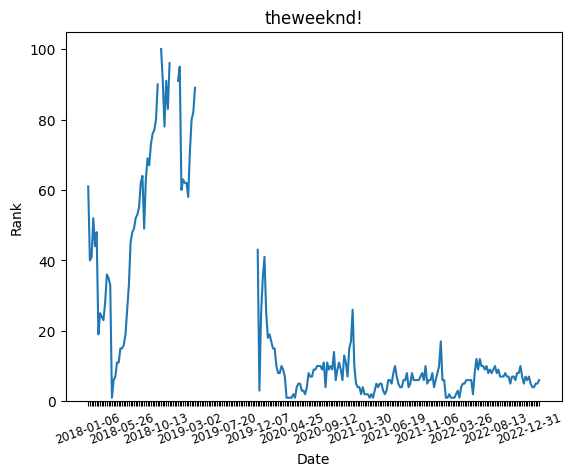

rank: 24, date: 2020-02-15
rank: 90, date: 2020-02-22
rank: 57, date: 2023-01-28
rank: 85, date: 2023-02-04


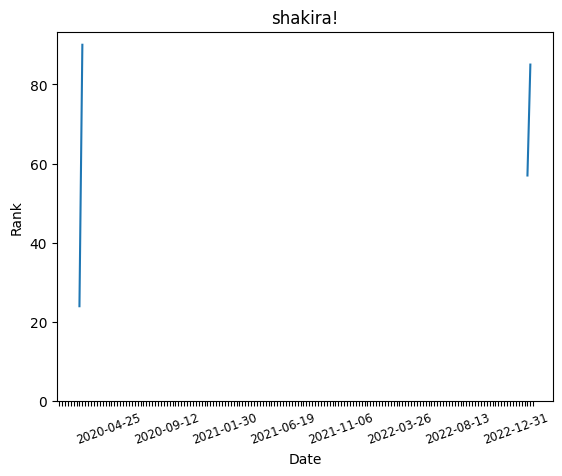

rank: 70, date: 2020-02-15
rank: 84, date: 2022-02-26


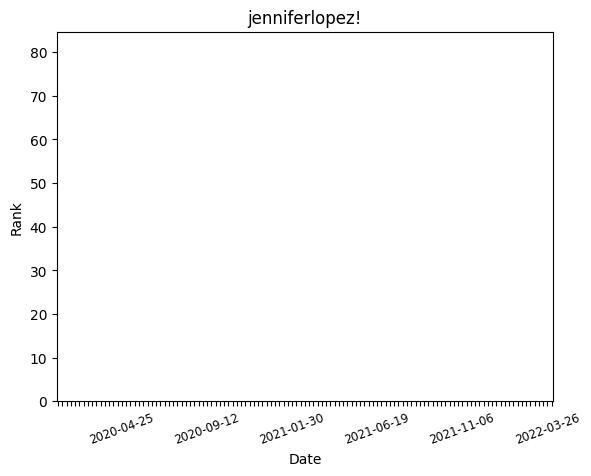

rank: 63, date: 2018-03-03
rank: 69, date: 2018-03-10
rank: 89, date: 2018-03-17
rank: 59, date: 2018-04-21
rank: 66, date: 2018-04-28
rank: 66, date: 2018-05-05
rank: 66, date: 2018-05-12
rank: 71, date: 2018-05-19
rank: 86, date: 2018-05-26
rank: 86, date: 2018-06-02
rank: 61, date: 2018-06-09
rank: 56, date: 2018-06-16
rank: 49, date: 2018-06-23
rank: 58, date: 2018-06-30
rank: 50, date: 2018-07-07
rank: 30, date: 2018-07-14
rank: 34, date: 2018-07-21
rank: 32, date: 2018-07-28
rank: 35, date: 2018-08-04
rank: 39, date: 2018-08-11
rank: 43, date: 2018-08-18
rank: 45, date: 2018-08-25
rank: 42, date: 2018-09-01
rank: 49, date: 2018-09-08
rank: 44, date: 2018-09-15
rank: 55, date: 2018-09-22
rank: 71, date: 2018-09-29
rank: 69, date: 2018-10-06
rank: 61, date: 2018-10-13
rank: 48, date: 2018-10-20
rank: 23, date: 2018-10-27
rank: 42, date: 2018-11-03
rank: 50, date: 2018-11-10
rank: 48, date: 2018-11-17
rank: 45, date: 2018-11-24
rank: 45, date: 2018-12-01
rank: 53, date: 2018-12-08
r

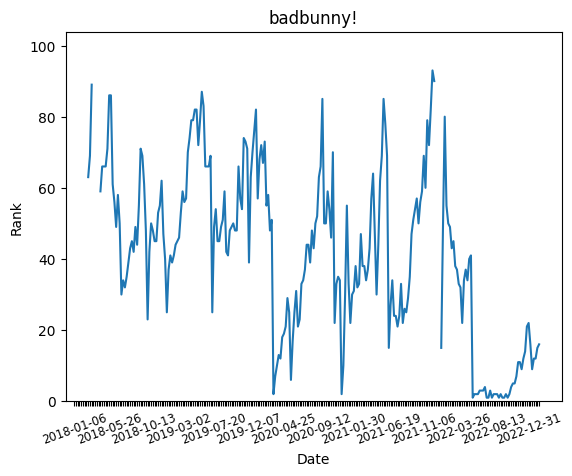

rank: 89, date: 2018-02-03
rank: 67, date: 2018-03-17
rank: 80, date: 2018-03-24
rank: 72, date: 2018-03-31
rank: 73, date: 2018-04-07
rank: 95, date: 2018-04-14
rank: 52, date: 2018-04-21
rank: 55, date: 2018-04-28
rank: 46, date: 2018-05-05
rank: 54, date: 2018-05-12
rank: 57, date: 2018-05-19
rank: 59, date: 2018-05-26
rank: 55, date: 2018-06-02
rank: 16, date: 2018-06-09
rank: 34, date: 2018-06-16
rank: 38, date: 2018-06-23
rank: 40, date: 2018-06-30
rank: 32, date: 2018-07-07
rank: 28, date: 2018-07-14
rank: 27, date: 2018-07-21
rank: 26, date: 2018-07-28
rank: 24, date: 2018-08-04
rank: 29, date: 2018-08-11
rank: 30, date: 2018-08-18
rank: 31, date: 2018-08-25
rank: 31, date: 2018-09-01
rank: 34, date: 2018-09-08
rank: 36, date: 2018-09-15
rank: 42, date: 2018-09-22
rank: 52, date: 2018-09-29
rank: 53, date: 2018-10-06
rank: 63, date: 2018-10-13
rank: 68, date: 2018-10-20
rank: 74, date: 2018-10-27
rank: 82, date: 2018-11-03
rank: 92, date: 2018-11-10
rank: 90, date: 2018-11-17
r

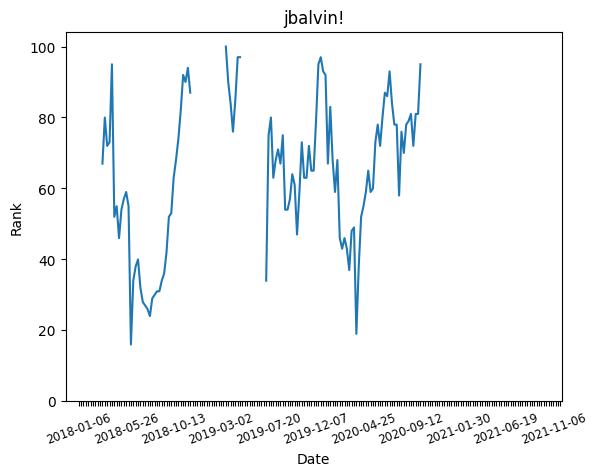

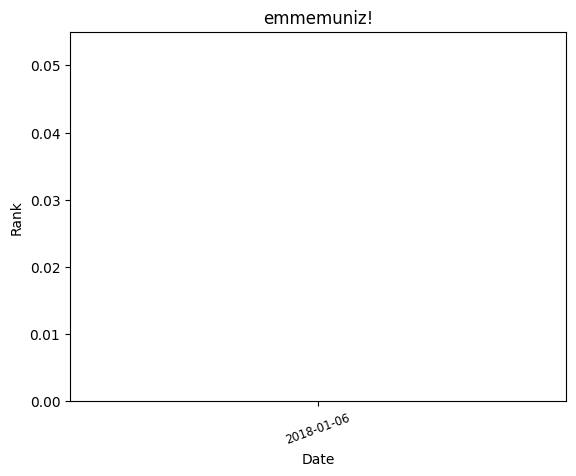

rank: 32, date: 2018-01-06
rank: 22, date: 2018-01-13
rank: 25, date: 2018-01-20
rank: 26, date: 2018-01-27
rank: 23, date: 2018-02-03
rank: 19, date: 2018-02-10
rank: 21, date: 2018-02-17
rank: 19, date: 2018-02-24
rank: 22, date: 2018-03-03
rank: 18, date: 2018-03-10
rank: 16, date: 2018-03-17
rank: 17, date: 2018-03-24
rank: 19, date: 2018-03-31
rank: 15, date: 2018-04-07
rank: 17, date: 2018-04-14
rank: 17, date: 2018-04-21
rank: 23, date: 2018-04-28
rank: 19, date: 2018-05-05
rank: 18, date: 2018-05-12
rank: 21, date: 2018-05-19
rank: 22, date: 2018-05-26
rank: 24, date: 2018-06-02
rank: 9, date: 2018-06-09
rank: 9, date: 2018-06-16
rank: 11, date: 2018-06-23
rank: 10, date: 2018-06-30
rank: 9, date: 2018-07-07
rank: 9, date: 2018-07-14
rank: 7, date: 2018-07-21
rank: 8, date: 2018-07-28
rank: 8, date: 2018-08-04
rank: 6, date: 2018-08-11
rank: 7, date: 2018-08-18
rank: 9, date: 2018-08-25
rank: 11, date: 2018-09-01
rank: 11, date: 2018-09-08
rank: 10, date: 2018-09-15
rank: 15, d

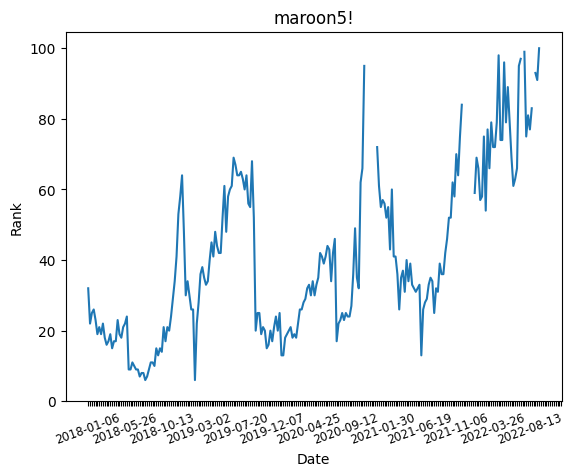

rank: 52, date: 2018-01-06
rank: 51, date: 2018-01-13
rank: 39, date: 2018-01-20
rank: 46, date: 2018-01-27
rank: 54, date: 2018-02-03
rank: 53, date: 2018-02-10
rank: 43, date: 2018-02-17
rank: 48, date: 2018-02-24
rank: 59, date: 2018-03-03
rank: 64, date: 2018-03-10
rank: 63, date: 2018-03-17
rank: 78, date: 2018-03-24
rank: 86, date: 2018-03-31
rank: 89, date: 2018-04-07
rank: 91, date: 2018-04-14
rank: 86, date: 2018-05-05
rank: 91, date: 2018-05-12
rank: 40, date: 2018-05-19
rank: 65, date: 2018-05-26
rank: 75, date: 2018-06-02
rank: 82, date: 2018-06-09
rank: 92, date: 2018-06-16
rank: 94, date: 2018-06-23
rank: 64, date: 2018-08-11
rank: 1, date: 2018-08-18
rank: 1, date: 2018-08-25
rank: 5, date: 2018-09-01
rank: 3, date: 2018-09-08
rank: 8, date: 2018-09-15
rank: 11, date: 2018-09-22
rank: 7, date: 2018-09-29
rank: 8, date: 2018-10-06
rank: 12, date: 2018-10-13
rank: 18, date: 2018-10-20
rank: 12, date: 2018-10-27
rank: 12, date: 2018-11-03
rank: 12, date: 2018-11-10
rank: 13

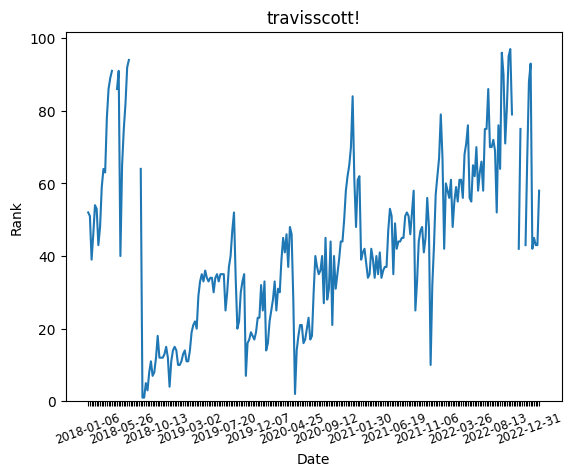

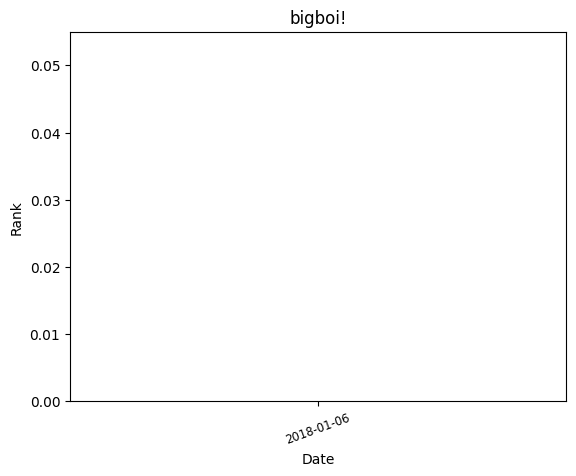

rank: 93, date: 2018-01-06
rank: 46, date: 2018-01-13
rank: 11, date: 2018-01-20
rank: 18, date: 2018-01-27
rank: 10, date: 2018-02-03
rank: 12, date: 2018-02-10
rank: 1, date: 2018-02-17
rank: 2, date: 2018-02-24
rank: 6, date: 2018-03-03
rank: 12, date: 2018-03-10
rank: 11, date: 2018-03-17
rank: 16, date: 2018-03-24
rank: 20, date: 2018-03-31
rank: 16, date: 2018-04-07
rank: 20, date: 2018-04-14
rank: 26, date: 2018-04-21
rank: 33, date: 2018-04-28
rank: 40, date: 2018-05-05
rank: 38, date: 2018-05-12
rank: 41, date: 2018-05-19
rank: 42, date: 2018-05-26
rank: 47, date: 2018-06-02
rank: 55, date: 2018-06-09
rank: 62, date: 2018-06-16
rank: 62, date: 2018-06-23
rank: 75, date: 2018-06-30
rank: 70, date: 2018-07-07
rank: 50, date: 2018-07-14
rank: 51, date: 2018-07-21
rank: 60, date: 2018-07-28
rank: 61, date: 2018-08-04
rank: 69, date: 2018-08-11
rank: 67, date: 2018-08-18
rank: 84, date: 2018-08-25
rank: 85, date: 2018-09-01
rank: 67, date: 2018-09-08
rank: 75, date: 2018-09-15
rank

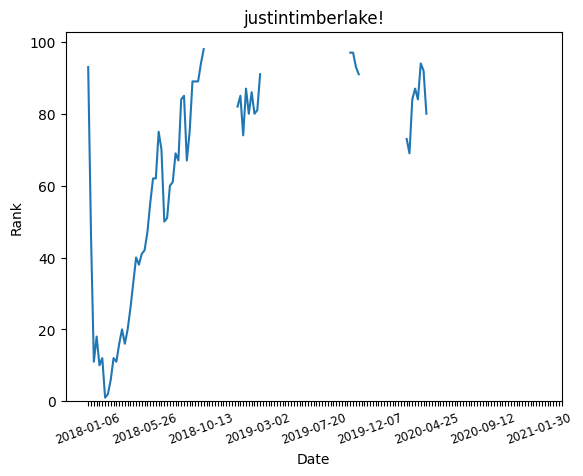

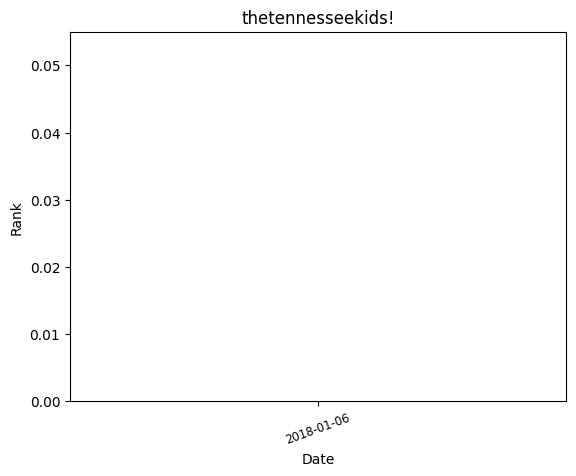

In [219]:
def prepare_chart_database(chart_database,artist):
    artist = normalize_str(artist)
    """ Modifies the database for a fast comparision
    
    Precalculate the value of every entry in each chart. 
    The returned value for a no. 1 song is 100, the value of a no. 2 song is 99,
    etc., the value of a no. 100 song is 1. 
    Normalize the song title and artist name of each chart entry.
    Save every chart entry as a list of tuples: (value, norm_title, norm_artist)
    The position information of the entry is still there because of its index. 
    """
   # prepared_chart_database = OrderedDict()
    xvals = []
    yvals = []
    for chart_date, chart in reversed(chart_database.items()):
        found = False
        for i,song in enumerate(chart):
            if(normalize_str(song.artist) == artist):
                
                print(f"rank: {i+1}, date: {chart_date}")
                xvals.append(i+1)
                yvals.append( chart_date)
                found = True
                break
        if(not found):
              
            xvals.append(np.nan)
            yvals.append( chart_date)
    fig, ax = plt.subplots()

    plt.plot(yvals, xvals)
    
    # naming the x axis
    plt.ylim(0)
    plt.ylabel('Rank')
    # naming the y axis
    plt.xlabel('Date')
    
    # giving a title to my graph
    plt.title(f'{artist}!')
    for i, label in enumerate(ax.get_xticklabels()):
        if i % 20 != 0:
            label.set_visible(False)
    plt.xticks(rotation=20, fontsize = 'small')

    # function to show the plot
    plt.show()
    fig.savefig(artist + '.png', dpi = 300)

       # prepared_chart_database[chart_date] = [(i, normalize_str(song.title), normalize_str(song.artist)) for i, song in enumerate(chart)]

  #  return  prepared_chart_database   
chart_database = pickle.load(open("artist-100-2018.pkl", "rb")) 
    # Rearrange items and normalise song titles and artist names.
for i in  ["Rihanna", "Eminem", "Dr. Dre.", "Snoop Dogg", "Kendrick Lamar", "Mary J. Blige", "The Weeknd","Shakira", "Jennifer Lopez", "Bad Bunny", "J Balvin", "Emme Muniz", "Maroon 5","Travis Scott", "Big Boi", "Justin Timberlake", "The Tennessee Kids"]:
    prepare_chart_database(chart_database,i)




In [ ]:
import matplotlib.pyplot as plt
def plot_data_chart(min_year, max_year, title, data,artist):
    years = list(range(min_year, max_year+1, 1))
    values = []
    for y in years:
        if y not in data:
            values.append(0)
        else:
            values.append(data[y])
    fig = plt.figure(1)

    plt.plot(years, values, marker='o', label=artist) 
    
    plt.ylim(None, 100)
    #plt.grid(True)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Chart Ranking')
    #plt.legend(loc='upper left')
    
    fig.savefig(title + '.png', dpi = 300)
    
    plt.show()


In [156]:
print(normalize_str("TEST_Ts-t_Tsast"))

testtsttsast
